In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from mpl_toolkits.basemap import Basemap, addcyclic
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#import seaborn as sns

In [7]:
SKEdataset=xr.open_dataset('/home/suvarchal/G5NR/SKEDot_90x45_v3.nc')

In [8]:
SKEdataset.data_vars

Data variables:
    KEDOT    (time, lat, lon) float64 0.0003175 -0.0001472 -0.0004297 ...
    SKEDOT   (time, lat, lon) float64 1.45e-05 -0.0002174 -0.0003302 ...
    SKE      (time, lat, lon) float64 215.8 221.4 229.6 236.6 241.6 246.4 ...
    PREC     (time, lat, lon) float64 3.842e-07 2.693e-07 1.732e-07 ...

In [12]:
kedot,cyc_lon=addcyclic(SKEdataset.KEDOT.mean(dim='time'),SKEdataset.lon)
prec,cyc_lon=addcyclic(SKEdataset.PREC.mean(dim='time'),SKEdataset.lon)
lon_2d,lat_2d=np.meshgrid(cyc_lon,SKEdataset.lat)

<a list of 29 text.Text objects>

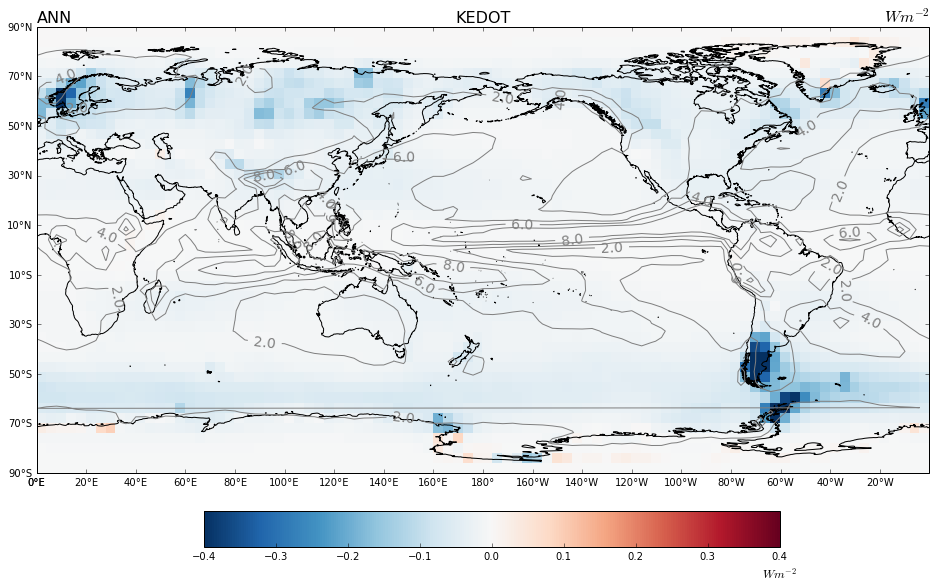

In [16]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

cax = fig.add_axes([0.27, 0.1, 0.5, 0.05])
ax.set_title('KEDOT', size=16)
ax.set_title('ANN', size=16,loc="left")
ax.set_title('$W m^{-2}$', size=16,loc="right")

c=ax.pcolormesh(lon_2d,lat_2d,kedot,cmap='RdBu_r',vmin=-0.4,vmax=0.4,transform=ccrs.PlateCarree(central_longitude=0))
plevels=np.arange(0,10,2)
c1=ax.contour(lon_2d,lat_2d,prec*86400,colors='Gray',levels=plevels,transform=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('50m')
ax.set_yticks(np.arange(-90,100,20), crs=ccrs.PlateCarree(central_longitude=180))
ax.set_xticks(np.arange(0,380,20),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = fig.colorbar(c, cax=cax,orientation='horizontal')
cb.set_label(r'$W m^{-2}$', size='large',position=(1.0,0.04))
plt.clabel(c1,plevels[0::1],inline=1,fmt='%1.1f',fontsize=14)

In [18]:
SKEdataset_seas=SKEdataset.groupby('time.season').mean(dim='time')

In [19]:
SKEdataset_seas

<xarray.Dataset>
Dimensions:  (lat: 45, lon: 90, season: 4)
Coordinates:
  * lon      (lon) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0 32.0 36.0 ...
  * lat      (lat) float64 -90.0 -85.91 -81.82 -77.73 -73.64 -69.55 -65.45 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    SKE      (season, lat, lon) float64 338.6 340.8 337.1 333.5 331.7 330.7 ...
    SKEDOT   (season, lat, lon) float64 -8.105e-05 -8.017e-05 -8.021e-05 ...
    KEDOT    (season, lat, lon) float64 -0.0001191 -0.0001037 -9.102e-05 ...
    PREC     (season, lat, lon) float64 1.287e-06 1.237e-06 1.19e-06 ...

<a list of 37 text.Text objects>

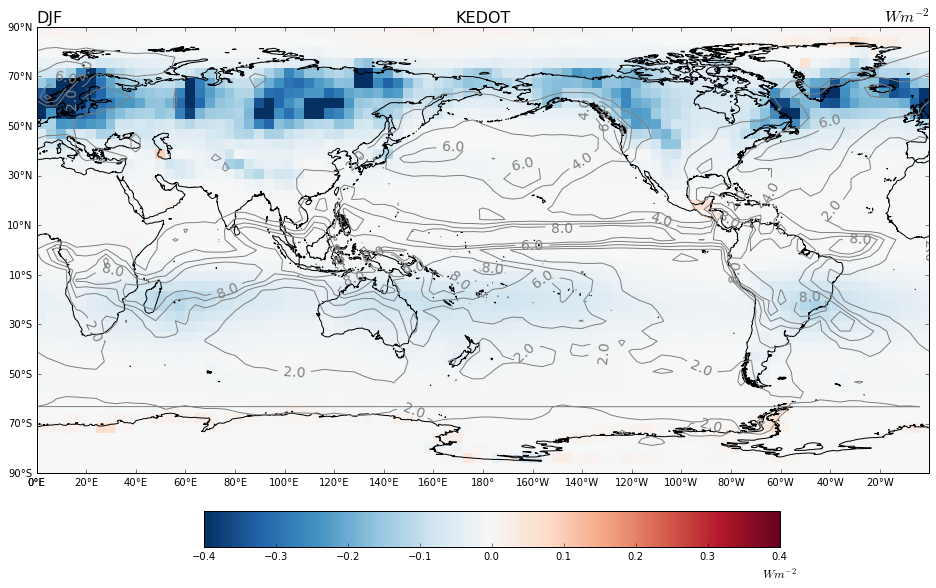

In [21]:
kedot,cyc_lon=addcyclic(SKEdataset_seas.KEDOT[0,:,:],SKEdataset_seas.lon)
prec,cyc_lon=addcyclic(SKEdataset_seas.PREC[0,:,:],SKEdataset_seas.lon)
lon_2d,lat_2d=np.meshgrid(cyc_lon,SKEdataset_seas.lat)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

cax = fig.add_axes([0.27, 0.1, 0.5, 0.05])
ax.set_title('KEDOT', size=16)
ax.set_title('DJF', size=16,loc="left")
ax.set_title('$W m^{-2}$', size=16,loc="right")

c=ax.pcolormesh(lon_2d,lat_2d,kedot,cmap='RdBu_r',vmin=-0.4,vmax=0.4,transform=ccrs.PlateCarree(central_longitude=0))
plevels=np.arange(0,10,2)
c1=ax.contour(lon_2d,lat_2d,prec*86400,colors='Gray',levels=plevels,transform=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('50m')
ax.set_yticks(np.arange(-90,100,20), crs=ccrs.PlateCarree(central_longitude=180))
ax.set_xticks(np.arange(0,380,20),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = fig.colorbar(c, cax=cax,orientation='horizontal')
cb.set_label(r'$W m^{-2}$', size='large',position=(1.0,0.04))
plt.clabel(c1,plevels[0::1],inline=1,fmt='%1.1f',fontsize=14)

In [22]:
areafile=xr.open_dataset('/home/suvarchal/G5NR/area_all2Dvars_4deg.nc')
lsmask=xr.open_dataset('/home/suvarchal/G5NR_90x45_seamask.nc')

In [7]:
#if we want to mask land 
#areafile=xr.open_dataset('/home/suvarchal/G5NR/area_all2Dvars_4deg.nc')
#lsmask=xr.open_dataset('/home/suvarchal/G5NR_90x45_seamask.nc')
#SEAdataset=SEAdataset.where(lsmask.topo==0.0) 
#areafile=areafile.where(lsmask.topo==0.0) 

In [27]:
kedotarea=areafile.cell_area*SKEdataset.SKEDOT.mean(dim='time')

In [30]:
np.nansum(kedotarea)/np.nansum(areafile.cell_area)

-0.0015726725481979929